# WEEK 4 PROJECT: BIKE DATA
___________________________________________________________________________
___________________________________________________________________________

**FOCUS:** 
> Explore DC bike data to understand the demand for bicycle rentals OVER TIME.

> and fit a REGRESSION lINE to the data.
___________________________________________________________________________

___________________________________________________________________________
- **DATA SOURCES**: dc_bikes.csv.

___________________________________________________________________________
- **GEOGPRAPCHIC FRAME**: WDC (USA).

_____________________________________________________________________________
- **SEGMENT**: Casual customers.

_____________________________________________________________________________
- **TIMEFRAME**: '2011-01-01 00:00:00' - '2012-12-31 23:00:00'.
    


___________________________________________________________________________
- **QUESTIONS**:

    > *Q1. What is the **yearly rentals evolution** for casual customers?
     
        - Lineplot for 2011
        - Lineplot for 2012
    
    > *Q2. What is the **probability distribution** of the casual rentals?

        - Histplot with sample means dsitribution.

    > *Q3. Which **atmospheric variables** could have strongest impact on **the casual rentals**?
        
        - Heatmap > Correlation > avg_temp
        

    > *Q4. Which **single independent variable** could predict the casual rental weeks?
       
        - Linear regression - Model 1 - set 1 of variable - avg_temp



# 0. IMPORTING LIBRARIES
___________________________________________________________________________

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import datetime as dt

# 1. DATA READING AND EDA
___________________________________________________________________________

### 1.1.Y Reading Initial Dataset(s)

In [11]:
# loading data
data = pd.read_csv("./data/dc_bikes.csv", index_col=0, parse_dates=True)
#data.rename(columns={"Total fertility rate":"country"}, inplace=True)
#x.set_index("country", inplace=True)
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67


In [ ]:
data.info()

In [20]:
data.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-07-31 11:00:00,3,0,1,1,31.16,35.605,58,0.0000,NaN,NaN,152
2012-09-05 06:00:00,3,0,1,1,28.70,33.335,79,19.0012,7.0,203.0,210
2012-06-14 00:00:00,2,0,1,1,24.60,31.060,53,19.9995,3.0,45.0,48
2011-10-04 11:00:00,4,0,1,1,22.14,25.760,64,19.0012,22.0,102.0,124
2011-07-25 20:00:00,3,0,1,1,29.52,34.850,74,8.9981,NaN,NaN,297
2012-03-06 03:00:00,1,0,1,1,7.38,8.335,51,19.0012,0.0,1.0,1
2011-10-24 03:00:00,4,0,1,1,16.40,20.455,82,6.0032,NaN,NaN,8
2012-02-13 17:00:00,1,0,1,1,14.76,17.425,23,12.9980,8.0,399.0,407
2011-06-12 07:00:00,2,0,0,1,26.24,29.545,78,7.0015,7.0,27.0,34


### 1.2.Y. EDA And NaN Values > DROPPING NAN VALUES

In [22]:
data.isnull().sum(axis=0)

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count            0
dtype: int64

In [30]:
# FILTERING FOR NULL VALUES TO CHECK IF ONLY CASUAL AND REGISTERED COLUMNS ARE AFFECTED

nulldata = data[data["registered"].isnull()]
nulldata.notnull().sum()

season        6493
holiday       6493
workingday    6493
weather       6493
temp          6493
atemp         6493
humidity      6493
windspeed     6493
casual           0
registered       0
count         6493
dtype: int64

In [29]:
# FILTERING FOR  NOT NULL VALUES TO CHECK IF ONLY CASUAL AND REGISTERED COLUMNS ARE AFFECTED

notnulldata = data[data["registered"].notnull()]
notnulldata.isnull().sum() 

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [31]:
# IMPORTANT: DUE TO LACK OF TIME, IM PROCEEDING WITH DROP NAN VALUES.
# IT WOULD HAVE BEEN INTERESTING TO FILL THE NAN CASES WITH SOME KIND OF SAMPLE BASED VALUES.
# HOWEVER, NO TIME AVAILABLE.

# DROPPING NAN VALUES

data.dropna(inplace=True)

In [32]:
data.shape

(10886, 11)

In [2]:
# data.columns

In [ ]:
# data.index

In [33]:
data.describe()#include="O")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# CHEKCING SPECIFIC ROWS

# data[data["col1"]=="categ1"]

In [ ]:
# DF TYPE CASTING COLUMNS

# data["population"] = data["population"].astype(int)
# data["population_m"]= data["population"]/1_000_000

# data

In [ ]:
# NUMBER OF OCURRENCES, VALUE_COUNTS()

# penguins["col2"].value_counts()


# NAN OUT OF CONSIDERATION

# penguins["col2"].value_counts(dropna=True)


# NORMALIZE gives % values

# penguins["col2"].value_counts(normalize=True) 

### 1.3.Y. Merging Datasets

In [ ]:
# OPEN QUESTION: How to merge multiple DFs simultaneously?

In [3]:
# IS THERE NEED FOR MERGING DIFFERENT DATASETS?
# IF YES, CODE AS FOLLOWS:

In [38]:

groupyearmerged = pd.merge(
    groupyearmerged_2011
    ,groupyearmerged_2012
    ,how="inner"
    ,on=["year","month","week"] # the join can be based on several columns [list]
)

In [24]:
#groupyearmerged.set_index("Unnamed: 0")
#groupyearmerged.reset_index(col_level=1, inplace=True)
#del groupyearmerged["Unnamed: 0"]
groupyearmerged.to_csv("./data/groupyearmerged.csv")

In [29]:
groupyearmerged = pd.read_csv("./data/groupyearmerged.csv", index_col=0)
del groupyearmerged["index"]
groupyearmerged


,year,month,week,sum_casual,sum_registered,sum_total,avg_temp,avg_wind,avg_humid
0,2011,1,1,668.0,8740.0,9408,7.754568,14.259875,49.333333
1,2011,1,2,674.0,8351.0,9025,7.535951,13.644653,53.447853
2,2011,1,3,204.0,3129.0,3333,9.409153,12.728864,68.305085
3,2011,2,5,722.0,8050.0,8772,9.386383,11.482660,68.907801
4,2011,2,6,1118.0,10074.0,11192,8.808712,13.356265,53.245399
...,...,...,...,...,...,...,...,...,...
82,2012,12,48,1843.0,7997.0,9840,13.239583,6.166792,81.500000
83,2012,12,49,3720.0,34042.0,37762,15.867976,10.964829,72.511905
84,2012,12,50,3080.0,32886.0,35966,13.769167,11.119448,66.827381
85,2012,12,51,978.0,14431.0,15409,15.534444,11.250510,73.291667


In [31]:
groupyearmerged.to_csv("./data/groupyearmerged.csv")

### 1.4.Y. Saving Cleaned & Merged Data

In [36]:
# SAVING THE CLEAN DATA INTO A CSV/EXCEL

data.to_csv("./data/data_dcbikes_clean.csv")

In [ ]:
groupyearmerged_2011.to_csv("./data/groupyearmerged_2011.csv")

In [ ]:
groupyearmerged_2012.to_csv("./data/groupyearmerged_2012.csv")

### 1.5.Y Loading Cleaned & Merged Data > YES


In [4]:
df_clean = pd.read_csv("./data/data_dcbikes_clean_and_newcol.csv", index_col=0, parse_dates=True)
groupyearmerged_2011 = pd.read_csv("./data/groupyearmerged_2011.csv")
groupyearmerged_2012 = pd.read_csv("./data/groupyearmerged_2012.csv")
groupyearmerged = pd.read_csv("./data/groupyearmerged.csv", index_col=0)

In [21]:
groupyearmerged_2011

,Unnamed: 0,year,month,week,sum_casual,sum_registered,sum_total,avg_temp,avg_wind,avg_humid
0,0,2011,1,1,668.0,8740.0,9408,7.754568,14.259875,49.333333
1,1,2011,1,2,674.0,8351.0,9025,7.535951,13.644653,53.447853
2,2,2011,1,3,204.0,3129.0,3333,9.409153,12.728864,68.305085
3,4,2011,2,5,722.0,8050.0,8772,9.386383,11.482660,68.907801
4,5,2011,2,6,1118.0,10074.0,11192,8.808712,13.356265,53.245399
5,6,2011,2,7,1936.0,10944.0,12880,16.157465,21.979020,38.746479
6,7,2011,3,9,1459.0,8837.0,10296,12.431888,17.251844,60.608392
7,8,2011,3,10,2750.0,10295.0,13045,13.260859,15.896017,50.754601
8,9,2011,3,11,3701.0,11693.0,15394,16.663571,14.950284,57.157143
9,10,2011,4,13,2856.0,4872.0,7728,13.575556,14.250156,60.666667


In [3]:
df_clean.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,week
datetime,,,,,,,,,,,,,,,
2011-04-04 05:00:00,2,0,1,1,16.40,20.455,62,16.9979,0.0,7.0,7,2011,2,4,14
2012-07-07 16:00:00,3,0,0,1,41.00,43.180,19,11.0014,102.0,192.0,294,2012,3,7,27
2012-01-08 05:00:00,1,0,0,2,13.12,16.665,49,7.0015,0.0,2.0,2,2012,1,1,1
2012-05-14 17:00:00,2,0,1,3,22.96,26.515,88,16.9979,25.0,204.0,229,2012,2,5,20
2011-12-18 00:00:00,4,0,0,1,8.20,10.605,75,8.9981,7.0,64.0,71,2011,4,12,50
2011-07-18 22:00:00,3,0,1,1,31.16,36.365,66,15.0013,36.0,104.0,140,2011,3,7,29
2011-09-10 19:00:00,3,0,0,1,28.70,32.575,58,8.9981,101.0,214.0,315,2011,3,9,36
2011-11-16 15:00:00,4,0,1,3,19.68,23.485,94,7.0015,16.0,50.0,66,2011,4,11,46
2011-12-19 08:00:00,4,0,1,1,8.20,9.850,75,12.9980,8.0,389.0,397,2011,4,12,51


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  quarter     10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  week        10886 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 1.3 MB


In [15]:
df.describe() #include="O")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,2.506614,6.521495,25.917784
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,1.116174,3.444373,15.017269
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,2.000000,4.000000,14.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,3.000000,7.000000,26.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,4.000000,10.000000,40.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,4.000000,12.000000,52.000000


In [ ]:
# DF TYPE CASTING COLUMNS

# df["population"] = df["population"].astype(int)
# df["population_m"]= df["population"]/1_000_000

# df

# 2. DATA WRANGLING: SUBSET, PIVOT, MELT, NEW COL
_______________________________________________________________________________

### 2.1.Y. Subsetting Data.


In [65]:
groupyearmerged_corr = groupyearmerged[["week","sum_casual","avg_temp","avg_wind","avg_humid"]] 
#groupyearmerged_2011_corr.sort_values(by=["week"], inplace=True)
groupyearmerged_corr=groupyearmerged_corr.corr()

### 2.3.N. Pivot Method


In [ ]:
# pivot_dfsse_popul = dfsse.pivot(
#     index=["year"]
#     ,columns=["country"]
#     ,values=["population"]
#     )

# pivot_dfsse_popul



### 2.4.N. Pivot_table Method


### 2.2.Y. New Columns And New Column Values.


In [16]:
df["year"] = df.index.year
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,week
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,1,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,1,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,1,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,1,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336,2012,4,12,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241,2012,4,12,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168,2012,4,12,51


In [17]:
df["quarter"] = df.index.quarter
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,week
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,1,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,1,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,1,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,1,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336,2012,4,12,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241,2012,4,12,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168,2012,4,12,51


In [18]:
df["month"] = df.index.month
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,week
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,1,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,1,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,1,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,1,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336,2012,4,12,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241,2012,4,12,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168,2012,4,12,51


In [19]:
df["week"] = df.index.weekofyear
df

C:\Users\K_Erg\AppData\Local\Temp\ipykernel_16212\2877884166.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df["week"] = df.index.weekofyear


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,week
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,1,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,1,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,1,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,1,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336,2012,4,12,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241,2012,4,12,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168,2012,4,12,51


In [22]:
# SAVING THE CURRENT VERSION OF MY DATA TO CSV
df.to_csv("./data/data_dcbikes_clean_and_newcol.csv")

In [ ]:
# ADDING NEW COLUMN WITH EMPTY VALUE
# dfsub["new_col"] = ""
# dfsub

In [ ]:
# # MULTIPLE COLUMN FILTERING AND VALUE ASSIGNMENT 

# # SPECIFYING COLUMN CONDITIONS - LIST 1
# cond = [
#     dfsub["country"].isin(["Categ1","Categ2"]), # COND 1
#     dfsub["country"].isin(["Categ1","Categ2"]) # COND 2
# ]


# # SPECIFYING VALUE TO BE ASSIGNED IF COND TRUE - LIST 2
# val = [
#     "yes", # VAL COND 1
#     "no" # VAL COND 2
# ]


# # NUMPY SELECT AND VALUE ASSIGMENT TO DIFFERENT COLUMN
# dfsub["eu_member"]= np.select(cond,val)

# dfsub.sample(10)


### 2.3.Y. Groupby() & Aggregation.


In [2]:
# 2. Group by : Split - Apply - Combine

# By “group by” we are referring to a process involving one or more of the following steps:

# 1. **SPLIT** the data into groups based on some criteria.

# 2. **APPLY** a function to each group independently.

# 3. **COMBINE** the results into a data structure.

# **Note:** The APPLY step can be Aggregation, Transformation or Filtration.

#### 2.3.1.N. Groupby(), using ``mean`` method**

In [ ]:
# now we can apply the mean method on each group for the body_mass_g column

# penguins.groupby("species")["body_mass_g"].mean()

#### 2.3.2.Y. Groupby(), using a dictionary and ``agg`` method**

In [2]:
# another option would be to use the dictionary syntax

agg_dict = {
    "casual":["sum"]
    ,"registered":["sum"]
    ,"count":["sum"]
    }

groupyear = df.groupby(
    ["year","month","week"]
    #,dropna=False
).agg(agg_dict)


KeyboardInterrupt



In [23]:
groupyear

casual registered  count
                    sum        sum    sum
year month week                          
2011 1     1      668.0     8740.0   9408
           2      674.0     8351.0   9025
           3      204.0     3129.0   3333
           52     462.0     1324.0   1786
     2     5      722.0     8050.0   8772
...                 ...        ...    ...
2012 11    47     449.0     5050.0   5499
     12    48    1843.0     7997.0   9840
           49    3720.0    34042.0  37762
           50    3080.0    32886.0  35966
           51     978.0    14431.0  15409

[87 rows x 3 columns]

In [24]:
groupyear.reset_index(col_level=1)

casual registered  count
    year month week     sum        sum    sum
0   2011     1    1   668.0     8740.0   9408
1   2011     1    2   674.0     8351.0   9025
2   2011     1    3   204.0     3129.0   3333
3   2011     1   52   462.0     1324.0   1786
4   2011     2    5   722.0     8050.0   8772
..   ...   ...  ...     ...        ...    ...
82  2012    11   47   449.0     5050.0   5499
83  2012    12   48  1843.0     7997.0   9840
84  2012    12   49  3720.0    34042.0  37762
85  2012    12   50  3080.0    32886.0  35966
86  2012    12   51   978.0    14431.0  15409

[87 rows x 6 columns]

In [25]:
groupyear.columns

MultiIndex([(    'casual', 'sum'),
            ('registered', 'sum'),
            (     'count', 'sum')],
           )

In [26]:
groupyear.columns = ["sum_casual","sum_registered","sum_total"] 

In [27]:
#groupyear.reset_index(col_level=1, inplace=True)
groupyear

sum_casual  sum_registered  sum_total
year month week                                       
2011 1     1          668.0          8740.0       9408
           2          674.0          8351.0       9025
           3          204.0          3129.0       3333
           52         462.0          1324.0       1786
     2     5          722.0          8050.0       8772
...                     ...             ...        ...
2012 11    47         449.0          5050.0       5499
     12    48        1843.0          7997.0       9840
           49        3720.0         34042.0      37762
           50        3080.0         32886.0      35966
           51         978.0         14431.0      15409

[87 rows x 3 columns]

In [28]:
groupyear.reset_index(col_level=1, inplace=True)

In [29]:
groupyear

,year,month,week,sum_casual,sum_registered,sum_total
0,2011,1,1,668.0,8740.0,9408
1,2011,1,2,674.0,8351.0,9025
2,2011,1,3,204.0,3129.0,3333
3,2011,1,52,462.0,1324.0,1786
4,2011,2,5,722.0,8050.0,8772
...,...,...,...,...,...,...
82,2012,11,47,449.0,5050.0,5499
83,2012,12,48,1843.0,7997.0,9840
84,2012,12,49,3720.0,34042.0,37762
85,2012,12,50,3080.0,32886.0,35966


In [32]:
# another option would be to use the dictionary syntax

agg_dict = {
    "temp":["mean"]
    ,"windspeed":["mean"]
    ,"humidity":["mean"]
    }

groupyear_weather = df.groupby(
    ["year","month","week"]
    #,dropna=False
).agg(agg_dict)

In [33]:
groupyear_weather

temp  windspeed   humidity
                      mean       mean       mean
year month week                                 
2011 1     1      7.754568  14.259875  49.333333
           2      7.535951  13.644653  53.447853
           3      9.409153  12.728864  68.305085
           52    14.498298  13.638206  75.212766
     2     5      9.386383  11.482660  68.907801
...                    ...        ...        ...
2012 11    47    15.614167  15.749467  62.333333
     12    48    13.239583   6.166792  81.500000
           49    15.867976  10.964829  72.511905
           50    13.769167  11.119448  66.827381
           51    15.534444  11.250510  73.291667

[87 rows x 3 columns]

In [35]:
groupyear_weather.columns = ["avg_temp","avg_wind","avg_humid"] 

In [36]:
groupyear_weather.reset_index(col_level=1, inplace=True)

In [37]:
groupyear_weather

,year,month,week,avg_temp,avg_wind,avg_humid
0,2011,1,1,7.754568,14.259875,49.333333
1,2011,1,2,7.535951,13.644653,53.447853
2,2011,1,3,9.409153,12.728864,68.305085
3,2011,1,52,14.498298,13.638206,75.212766
4,2011,2,5,9.386383,11.482660,68.907801
...,...,...,...,...,...,...
82,2012,11,47,15.614167,15.749467,62.333333
83,2012,12,48,13.239583,6.166792,81.500000
84,2012,12,49,15.867976,10.964829,72.511905
85,2012,12,50,13.769167,11.119448,66.827381


#### 2.3.3.N. Aggregation: OPTION 1, using a list

In [ ]:
# all aggregations in the list applied to the column specified

# penguins["bill_length_mm"].agg(["mean", "median","std"])

In [ ]:
# penguins[["bill_length_mm","bill_depth_mm"]].agg(["mean", "median","std"])
# adding a second set of sqrbr changesthe output to a dataframe
# also allows to add a new column, list of columns


In [ ]:
# penguins.groupby(["species","sex"], dropna=False).size().plot.barh()

#### 2.3.4.N. Pivot Method - PCT % Change 


In [6]:
# dfsse_perc = dfsub.pct_change(axis="rows")
# dfsse_perc


# 3. ANSWERS AND VISUALS
______________________________________________________________________________

## Answer Q1. What is the **yearly rentals evolution** for casual customers?

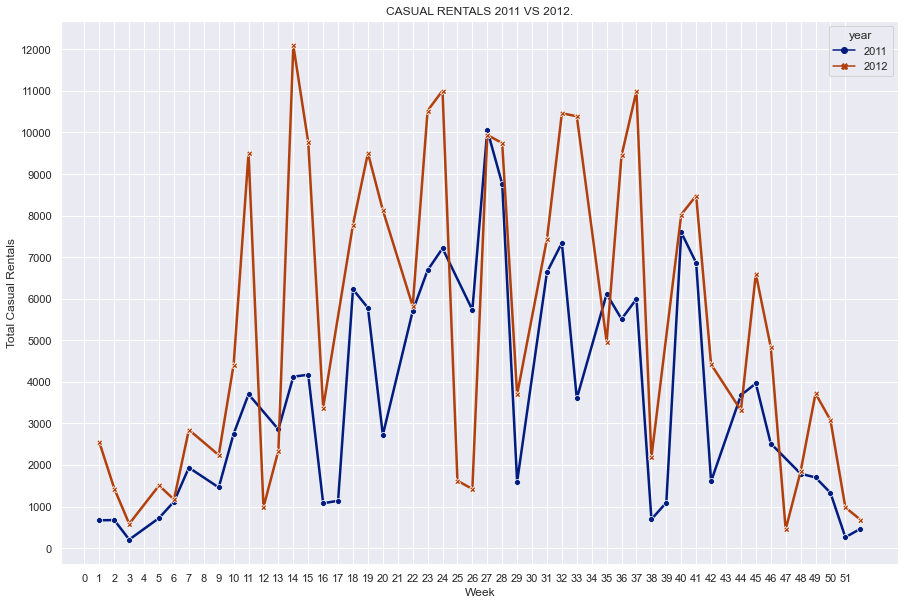

In [30]:
sns.set_style("darkgrid") #darkgrid #ticks
#palette = sns.color_palette("mako_r", 6)
plt.figure(figsize=(15, 10))
plt.title(f"CASUAL RENTALS 2011 VS 2012.")
plt.ylabel("Total Casual Rentals")
plt.xlabel("Week")
plt.xticks(np.arange(0,52, step=1))
plt.yticks(np.arange(0,13_000, step=1_000))


viz_q1 = sns.lineplot(
   data=groupyearmerged
   ,x="week"
   ,y="sum_casual"
   ,palette="dark"
   ,style="year"
   ,dashes=False
   ,markers=True
   ,hue="year"
   ,linewidth=2.5
   
),



plt.savefig("./data/casual_rentals.png")

## Answer Q2. What is the **probability distribution** of the casual rentals/week?



In [32]:
# extract the data
sum_casual_sample = groupyearmerged["sum_casual"]

# how do we take a sample with replacement ??
# .sample() all the observaitons that we had before, but shuffled

bootstrap_sample = sum_casual_sample.sample(frac=1, replace='True') #with replace can take twice, three times, etc
print(len(bootstrap_sample), bootstrap_sample.mean())

87 4676.35632183908


In [33]:
# initialize sample means list
sample_means = [] # emtpy list for the for loop

## let's take 10_000 bootstrap samples and record their means
for i in range(10_000):
    bootstrap_sample = sum_casual_sample.sample(frac=1, replace='True')
    sample_means.append(bootstrap_sample.mean())

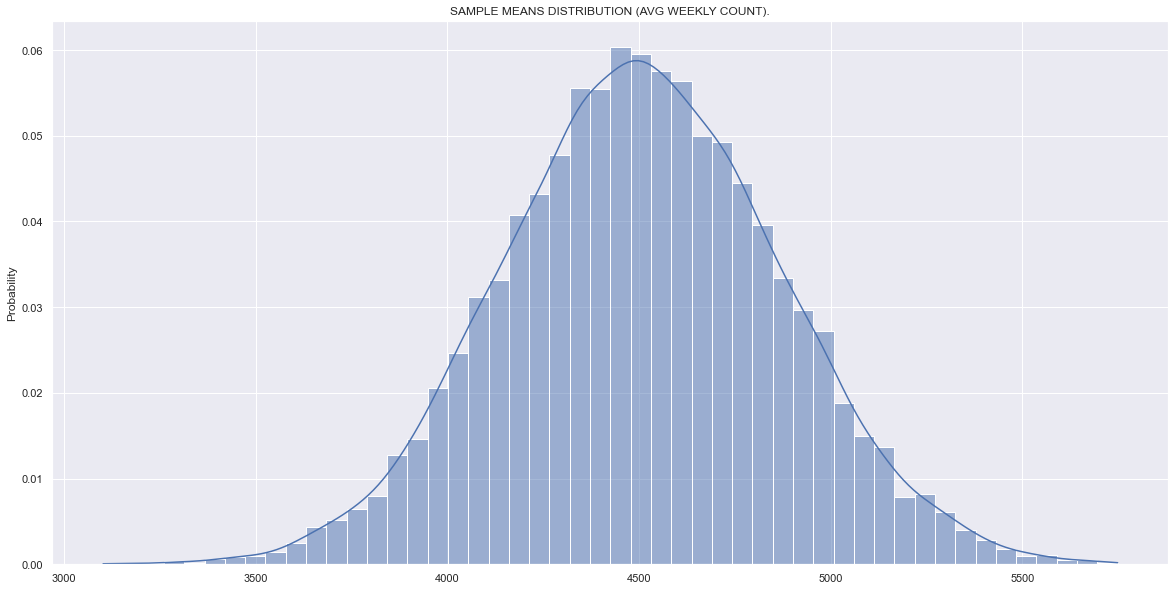

In [34]:
# let's plot the histogram of the sample means
sns.set_style("darkgrid") #darkgrid #ticks
plt.title(f"SAMPLE MEANS DISTRIBUTION (AVG WEEKLY COUNT).")
sns.set(rc = {'figure.figsize':(20,10)})

sns.histplot(
    sample_means
    ,bins=50
    ,stat="probability"
    ,kde=True
);
plt.savefig("./data/casual_rentals_sample means_.png")

In [35]:
# calculating the 95% confidence interval using pd.quantile

alpha = 0.95

lower_quantile = (1-alpha)/2  

upper_quantile = alpha + ((1-alpha)/2)

print(alpha, lower_quantile, upper_quantile)

0.95 0.025000000000000022 0.975


In [36]:
sample_means = pd.Series(sample_means)

lower_limit = sample_means.quantile(lower_quantile)

upper_limit = sample_means.quantile(upper_quantile)

print(f"""CONFIDENCE INTERVAL of the AVG CASUAL CUSTOMER RENTALS is
 between {lower_limit} and {upper_limit}.""")

CONFIDENCE INTERVAL of the AVG CASUAL CUSTOMER RENTALS is
 between 3802.206896551724 and 5224.889655172414.


## Answer Q3. Which **atmospheric variables** could have strongest impact on **the casual rentals**?


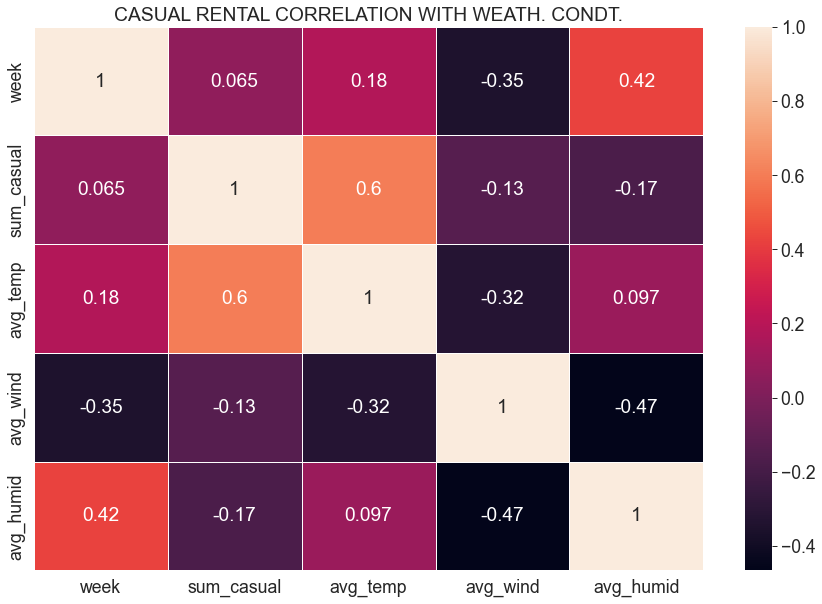

In [71]:
sns.set_style("darkgrid") #darkgrid #ticks
sns.set_context("paper", font_scale=2)   
palette = sns.color_palette("mako_r", 6)
plt.figure(figsize=(15, 10))
plt.title(f"CASUAL RENTAL CORRELATION WITH WEATH. CONDT.")

viz_q2 = sns.heatmap(
   data=groupyearmerged_corr
   ,annot=True
   ,linewidth=0.5  
),


plt.savefig("./data/casual_rentals_heatmap.png")

## Answer Q4. Which **single independent variable** could explain the top rental weeks?



In [5]:
# SPECIFYING THE VARIABLES OF MY SIMPLE LR MODEL

df_lr = groupyearmerged[["avg_temp","sum_casual"]] 
df_lr

,avg_temp,sum_casual
0,7.754568,668.0
1,7.535951,674.0
2,9.409153,204.0
3,9.386383,722.0
4,8.808712,1118.0
...,...,...
82,13.239583,1843.0
83,15.867976,3720.0
84,13.769167,3080.0
85,15.534444,978.0


In [6]:
# COMPUTING MY MODEL WITH SM.OLS

model = sm.ols(formula="sum_casual ~ avg_temp", data=df_lr).fit()
model.params

Intercept   -1302.210576
avg_temp      287.270550
dtype: float64

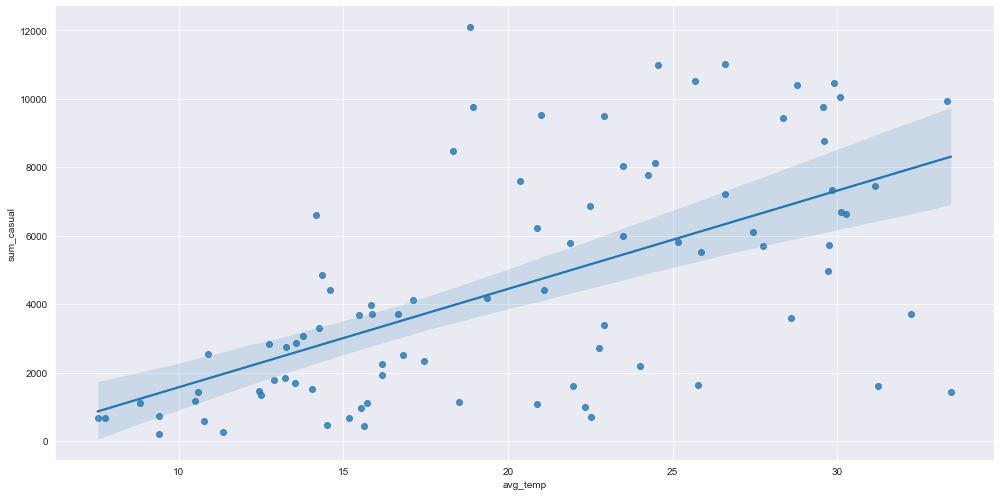

In [10]:
# PLOTTING THE LR MODEL
sns.set_style("darkgrid")
sns.lmplot(
    data=df_lr
    ,x='avg_temp'
    ,y='sum_casual'
    ,height=7
    ,aspect=2
    );

plt.savefig("./data/casual_lr_model.png")

# 4. HOW TO DEAL WITH NAN VALUES (NOT DROPPING THEM)?
_______________________________________________________________________________

https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

## Here are the ways to do that:

> * Inpute them with specific values > 0

> * Impute with special metrics, for example, mean or median.

> * Impute using a method: MICE or KNN.